# This page presents time series analysing to make data stationary before analysing and rest of statistics
# As input data the dataset without feature engineering were taken 

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels

In [2]:
# this are periods when 1,2,3,4 HEs were under operation
time_periods = [
    ("2022-09-12","2022-09-13"),
    ("2022-10-17","2022-10-21"), ("2022-11-08","2022-11-11"), ("2022-11-15","2022-11-18"),
    ("2022-11-22","2022-11-25"), ("2022-11-29","2022-12-02"), ("2022-12-05","2022-12-09"), 
    ("2022-12-12","2022-12-16"), ("2022-12-19","2022-12-23"), ("2023-01-10","2023-01-13"), 
    ("2023-01-16","2023-01-19"), ("2023-01-24","2023-01-27"), ("2023-01-31","2023-02-03"), 
    ("2023-02-07","2023-02-09"), ("2023-02-13","2023-02-17"), ("2023-02-28","2023-03-03"), 
    ("2023-03-06","2023-03-07"), ("2023-03-09","2023-03-10"), ("2023-03-14","2023-03-17"),
    ("2023-03-27","2023-03-31"), ("2023-04-03","2023-04-07"), ("2023-04-10","2023-04-14"),
]

time_periods2 = [
    ("2021-09-06","2021-09-10"), ("2021-09-13","2021-09-17"), ("2021-09-20","2021-10-01"),
    ("2021-10-04","2021-10-08"), ("2021-10-11","2021-10-15"), ("2021-11-08","2021-11-12"),
    ("2021-11-15","2021-11-19"), ("2021-11-22","2021-11-26"), ("2021-11-29","2021-12-03"),
    ("2021-12-07","2021-12-03"), ("2021-12-13","2021-12-17"), ("2021-12-20","2021-12-24"),
    ("2022-01-18","2022-01-21"), ("2022-01-24","2022-01-26"), ("2022-02-01","2022-02-04"),
    ("2022-02-08","2022-02-11"), ("2022-02-14","2022-02-18"), ("2022-02-24","2022-02-25"),
    ("2022-03-01","2022-03-04"), ("2022-03-15","2022-03-18"), ("2022-03-21","2022-03-25"),
    ("2022-03-29","2022-04-01"), ("2022-04-12","2022-04-15"), ("2022-04-18","2022-04-22"),
    ("2022-05-02","2022-05-06"), ("2022-05-09","2022-05-13"), ("2022-05-16","2022-05-20"),
    ("2022-05-23","2022-05-27"), ("2022-06-07","2022-06-10"), ("2022-06-20","2022-06-24"),
    ("2022-06-28","2022-07-01"),
    
]

time_periods3 = [
    ("2020-10-12","2020-10-16"), ("2020-10-21","2020-10-23"), ("2020-10-28","2020-10-30"),
    ("2020-11-11","2020-11-13"), ("2020-11-16","2020-11-20"), ("2020-11-24","2020-11-27"),
    ("2020-12-03","2020-12-04"), ("2020-12-07","2020-12-11"), ("2020-12-16","2020-12-18"), 
    ("2020-12-24","2020-12-25"), ("2020-12-29","2020-12-30"), ("2021-01-12","2021-01-15"),
    ("2021-01-18","2021-01-22"), ("2021-02-01","2021-02-05"), ("2021-02-08","2021-02-12"),
    ("2021-02-15","2021-02-19"), ("2021-03-01","2021-03-05"), ("2021-03-09","2021-03-12"),
    ("2021-03-15","2021-03-19"), ("2021-03-22","2021-03-26"), ("2021-04-01","2021-04-02"),
    ("2021-04-05","2021-04-09"), ("2021-04-05","2021-04-09"), ("2021-04-12","2021-04-16"),
    ("2021-04-20","2021-04-24"), ("2021-04-26","2021-04-30"), ("2021-05-03","2021-05-07"),
    ("2021-05-11","2021-05-15"), ("2021-05-17","2021-05-21"), ("2021-05-24","2021-05-28"),
    ("2021-06-15","2021-06-18"), ("2021-06-21","2021-06-25"), ("2021-06-28","2021-07-02"),
]

In [3]:
fcs = [
    ("2021-03-09", "2021-04-12"), ("2021-04-12", "2021-05-11"), ("2021-05-11", "2021-09-20")
]

In [4]:
time_periods_all = [*time_periods3, *time_periods2, *time_periods]

### All IDs used
* 299 Т1к после ТО
* 309 Р2контура
* 315 T1k before HE
* 317 Т2к перед ТО
* 319 Т2к после ТО
* 321 T reactor
* 325 Т2к выхТО1
* 327 Твозвуха
* 381 Iвг1
* 395 Iвг2
* 396 Iвг3
* 460 Т2к выхТО2
* 461 Т2к выхТО3
* 462 Т2к выхТО4
* 463 Т2к выхТО5
* 480 Q1k
* 481 Q2контура
#### Second loop I pumps id
* 406 2-1
* 407 2-2
* 408 2-3
* 409 2-4

In [5]:
sys.path.insert(0, os.path.split(os.path.abspath(""))[0])
sys.path.insert(0, os.path.join(os.path.split(os.path.abspath(""))[0], "app"))

In [6]:
from preprocessing import CsvRefactorer
from analytics import WaterFlowRates
from statistics import Statistics as st
from data_engineering import PeriodicDataPreprocess, FeatureEngineering
from statistics import *
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima import model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import acf, pacf, ccf

In [8]:
df = pd.read_excel("rdy_for_fe_121020_to_210423.xlsx", index_col="Timestamp")
df_nosma = pd.read_excel("rdy_for_fe_121020_to_210423_no_sma.xlsx", index_col="Timestamp")



In [8]:
df_stats = pd.read_excel("rdy_for_stats_121020_210423.xlsx", index_col="Timestamp")

# I assume that data of winter of 2021 is not clear cuz Tair is hardly reach -5
# However usually it dropsbelow -20 -> absolutly anomaly data
## Data till april of 2021 has dropped

In [9]:
df_stats = df_stats.loc["2021-04":, :]

In [562]:
df_stats_gr = df_stats.groupby(pd.Grouper(freq="4h")).mean()

In [563]:
df_stats_gr.columns

Index(['CTF1', 'CTF2', 'CTF3', 'P2', 'Q2', 'T1aHE', 'T1bHE', 'T2aHE', 'T2aHE1',
       'T2aHE2', 'T2aHE3', 'T2aHE4', 'T2aHE5', 'T2bHE', 'Tair', 'Treactor',
       'p21', 'p22', 'p23', 'p24', 'dt1', 'dt2', 'pumps2', 'dt_circuits_coef',
       'dt_circuits_coef_delta', 'I2mean', 'QbyIP', 'HE1_TOP', 'HE2_TOP',
       'HE3_TOP', 'HE4_TOP', 'HE5_TOP', 'HE1_status', 'HE2_status',
       'HE3_status', 'HE4_status', 'HE5_status', 'QbyIP_HEs_num',
       'QbyIP_HEs_pumps_num', 'Ndis_def', 'Ndis_by_delta',
       'Ndis_by_del_HEs_num', 'dt2_by_HEs', 'ff', 'HE_TOP_mean', 'CTF_sum'],
      dtype='object')

<AxesSubplot: xlabel='QbyIP', ylabel='Count'>

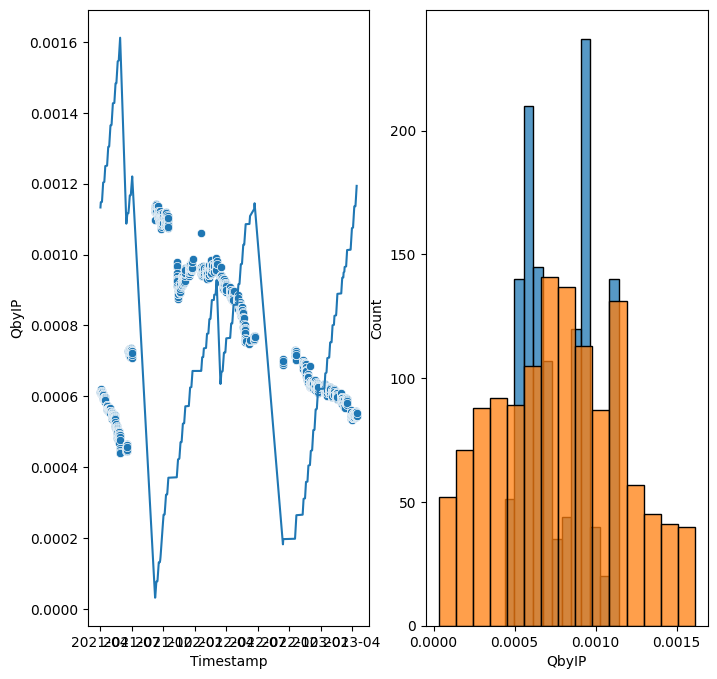

In [564]:
fig, axs = plt.subplots(1,2, figsize=(8,8))
sns.scatterplot(df_stats_gr["QbyIP"]/df_stats_gr["QbyIP"].sum(), ax=axs[0])
sns.lineplot(df_stats_gr["HE_TOP_mean"]/df_stats_gr["HE_TOP_mean"].sum(), ax=axs[0])
sns.histplot(df_stats_gr["QbyIP"]/df_stats_gr["QbyIP"].sum(), ax=axs[1])
sns.histplot(df_stats_gr["HE_TOP_mean"]/df_stats_gr["HE_TOP_mean"].sum(), ax=axs[1])



# Once again We may observe differend cycles which depends on whether new HE were taken to operation
## So now df going to be split by HEs in operation and their swaps

Timestamp
2021-04-01 20:00:00    10.700507
2021-04-02 00:00:00    10.638550
2021-04-02 04:00:00    10.595641
2021-04-02 08:00:00    10.615250
2021-04-02 12:00:00    10.826084
                         ...    
2021-05-28 04:00:00     7.668939
2021-05-28 08:00:00     7.694505
2021-05-28 12:00:00     7.805552
2021-05-28 16:00:00     7.727296
2021-05-28 20:00:00     7.704482
Name: QbyIP, Length: 191, dtype: float64


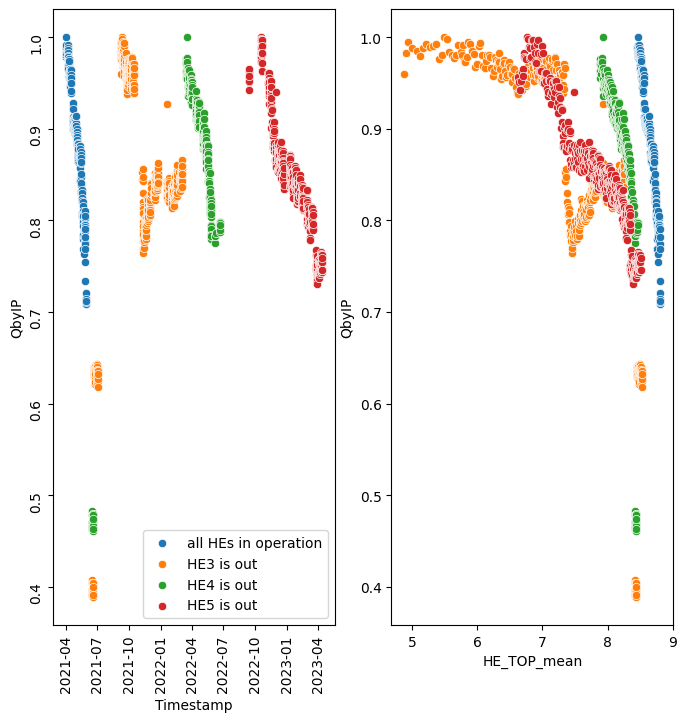

In [565]:

fig, axs = plt.subplots(1,2, figsize=(8,8))

qbyip = df_stats_gr["QbyIP"]

qbyip_all = qbyip[
    (df_stats_gr["HE3_status"] != 0)
    & (df_stats_gr["HE4_status"] != 0)
    & (df_stats_gr["HE5_status"] != 0)
    
].dropna(axis=0)
qbyip3 = qbyip[df_stats_gr["HE3_status"] == 0].dropna(axis=0)
qbyip4 = qbyip[df_stats_gr["HE4_status"] == 0].dropna(axis=0)
qbyip5 = qbyip[df_stats_gr["HE5_status"] == 0].dropna(axis=0)

print(qbyip_all)

hetop_all = df_stats_gr[
    (df_stats_gr["HE3_status"] != 0)
    & (df_stats_gr["HE4_status"] != 0)
    & (df_stats_gr["HE5_status"] != 0)
    
]["HE_TOP_mean"].dropna(axis=0)
hetop3 = df_stats_gr[df_stats_gr["HE3_status"] == 0]["HE_TOP_mean"].dropna(axis=0)
hetop4 = df_stats_gr[df_stats_gr["HE4_status"] == 0]["HE_TOP_mean"].dropna(axis=0)
hetop5 = df_stats_gr[df_stats_gr["HE5_status"] == 0]["HE_TOP_mean"].dropna(axis=0)


sns.scatterplot(qbyip_all / qbyip_all.max(), ax=axs[0], label="all HEs in operation")
sns.scatterplot(qbyip3 / qbyip3.max(), ax=axs[0], label="HE3 is out")
sns.scatterplot(qbyip4 / qbyip4.max(), ax=axs[0], label="HE4 is out")
sns.scatterplot(qbyip5 / qbyip5.max(), ax=axs[0], label="HE5 is out")
# sns.lineplot(df_stats_gr["HE_TOP_mean"]/df_stats_gr["HE_TOP_mean"].max(), ax=axs[0])

sns.scatterplot(x=np.log(hetop_all), y=qbyip_all / qbyip_all.max(), ax=axs[1])
sns.scatterplot(x=np.log(hetop3), y=qbyip3 / qbyip3.max(), ax=axs[1])
sns.scatterplot(x=np.log(hetop4), y=qbyip4 / qbyip4.max(), ax=axs[1])
sns.scatterplot(x=np.log(hetop5), y=qbyip5 / qbyip5.max(), ax=axs[1])

axs[0].tick_params(rotation=90)
# sns.scatterplot(qbyip / df_stats.loc[:, ["HE1_status", "HE2_status", "HE3_status", "HE4_status", "HE5_status"]].sum(axis=1))

In [566]:
qbyip_all

Timestamp
2021-04-01 20:00:00    10.700507
2021-04-02 00:00:00    10.638550
2021-04-02 04:00:00    10.595641
2021-04-02 08:00:00    10.615250
2021-04-02 12:00:00    10.826084
                         ...    
2021-05-28 04:00:00     7.668939
2021-05-28 08:00:00     7.694505
2021-05-28 12:00:00     7.805552
2021-05-28 16:00:00     7.727296
2021-05-28 20:00:00     7.704482
Name: QbyIP, Length: 191, dtype: float64

# On a first look, all curve habe similar trend no matter what HEs are in operation
# However, the cycles that starts from 0 (HE_TOP_mean) have 2 different trends
# It's quite obvious that each cycle is non-stationry regarding QbyIP
# Lets take a look on dt

In [567]:
df_all = df_stats_gr.loc[qbyip_all.index, :]

In [568]:
df_all = df_all.reset_index()

In [569]:
df_all["pumps2"].value_counts()

234.0     166
1234.0     25
Name: pumps2, dtype: int64

<AxesSubplot: xlabel='dt1', ylabel='Count'>

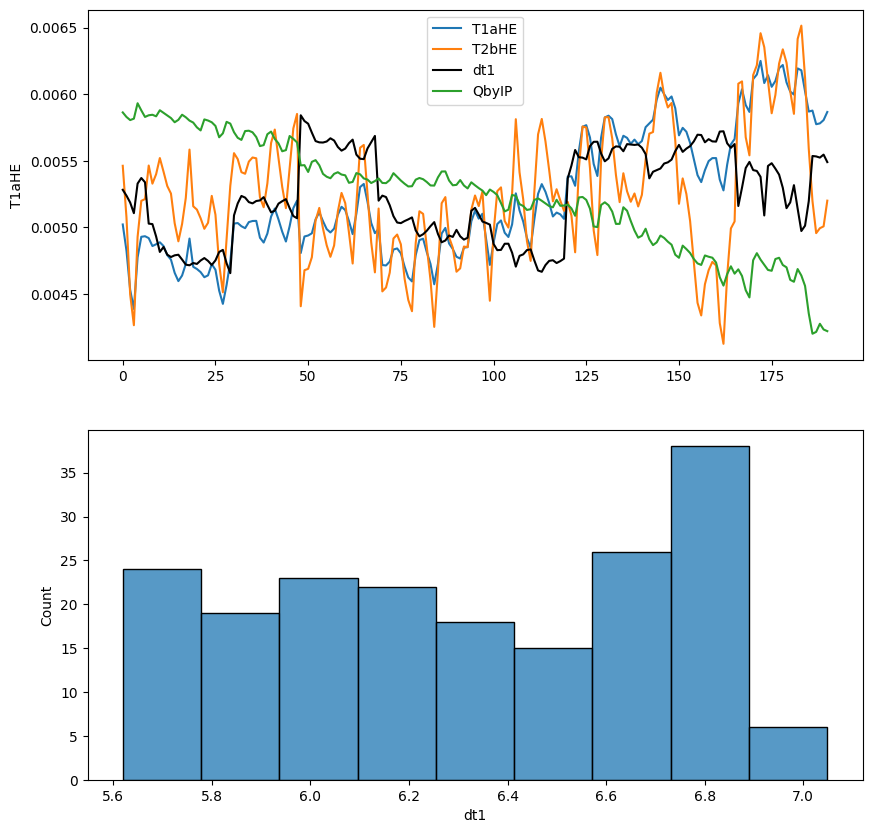

In [570]:
# dt1 distributed pretty random so there is dependent parameter --> fuel cycle

fig, axs = plt.subplots(2,1, figsize=(10,10))

sns.lineplot(df_all["T1aHE"] / df_all["T1aHE"].sum(), ax=axs[0], label="T1aHE")
sns.lineplot(df_all["T2bHE"] / df_all["T2bHE"].sum(), ax=axs[0], label="T2bHE")
sns.lineplot(df_all["dt1"] / df_all["dt1"].sum(), ax=axs[0], color="black", label="dt1")

sns.lineplot(df_all["QbyIP"] / df_all["QbyIP"].sum(), ax=axs[0], label="QbyIP")


sns.histplot(df_all["dt1"], ax=axs[1])


In [571]:
print(scipy.stats.kendalltau(df_all["T2bHE"], df_all["T1aHE"]))
print(scipy.stats.kendalltau(df_all["QbyIP"], df_all["T1aHE"]))
print(scipy.stats.kendalltau(df_all["T2bHE"], df_all["dt1"]))

SignificanceResult(statistic=0.47655001377790024, pvalue=1.2512847310614162e-22)
SignificanceResult(statistic=-0.5691375034444751, pvalue=1.4126851391769075e-31)
SignificanceResult(statistic=-0.10928630476715348, pvalue=0.024770238291613414)


In [572]:
# splitting df_all on fuel cycles and look up at data again
df_all_fc119 = df_all[
    (df_all["Timestamp"] > fcs[0][0])
    & (df_all["Timestamp"] < fcs[0][1])
]

df_all_fc120 = df_all[
    (df_all["Timestamp"] > fcs[1][0])
    & (df_all["Timestamp"] < fcs[1][1])
]

df_all_fc121 = df_all[
    (df_all["Timestamp"] > fcs[2][0])
    & (df_all["Timestamp"] < fcs[2][1])
]

<AxesSubplot: ylabel='CTF_sum'>

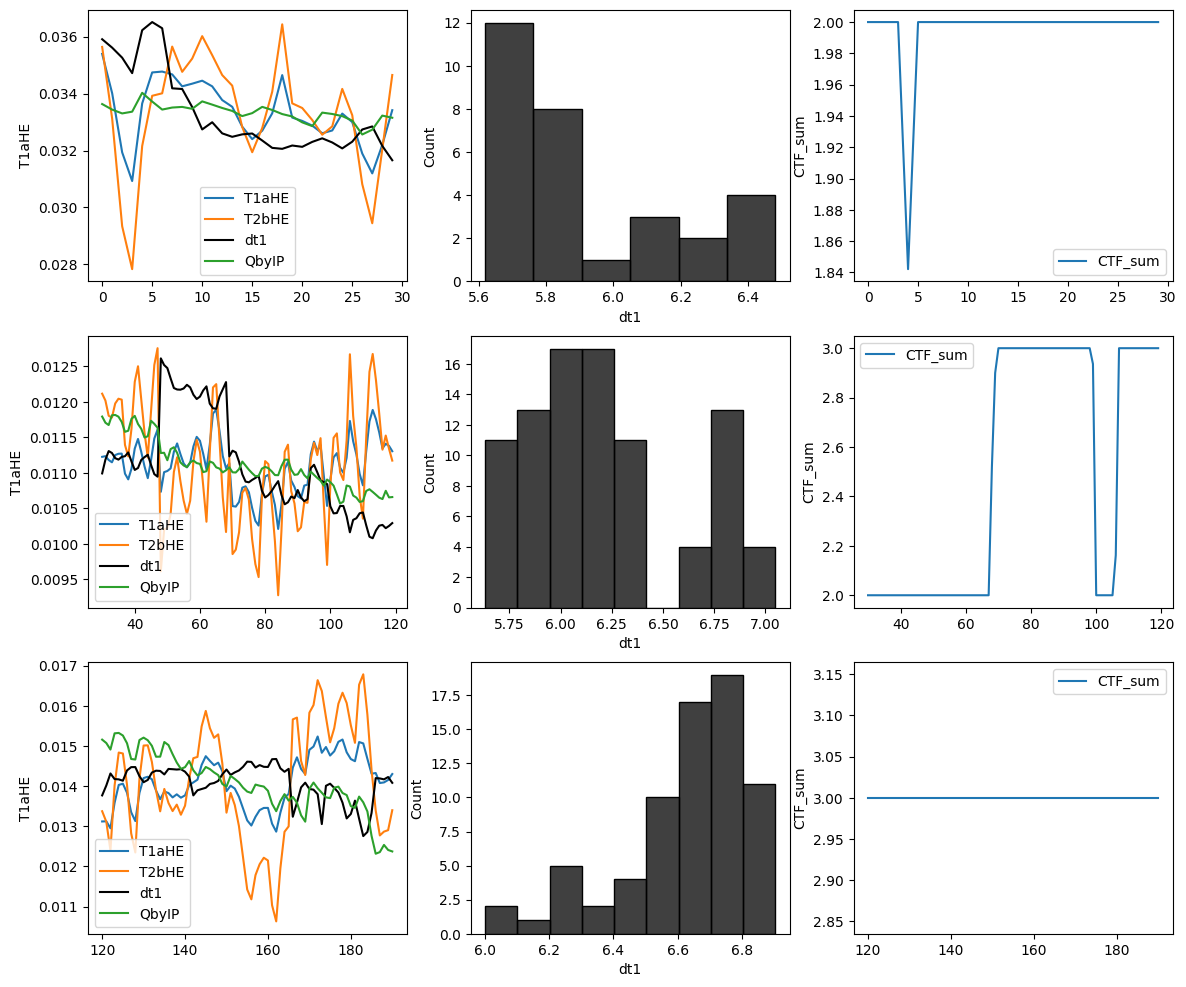

In [624]:
# dt1 distributed pretty random so there is dependent parameter --> fuel cycle

fig, axs = plt.subplots(3,3, figsize=(14,12))

sns.lineplot(df_all_fc119["T1aHE"] / df_all_fc119["T1aHE"].sum(), ax=axs[0][0], label="T1aHE")
sns.lineplot(df_all_fc119["T2bHE"] / df_all_fc119["T2bHE"].sum(), ax=axs[0][0], label="T2bHE")
sns.lineplot(df_all_fc119["dt1"] / df_all_fc119["dt1"].sum(), ax=axs[0][0], color="black", label="dt1")

sns.lineplot(df_all_fc119["QbyIP"] / df_all_fc119["QbyIP"].sum(), ax=axs[0][0], label="QbyIP")


sns.lineplot(df_all_fc120["T1aHE"] / df_all_fc120["T1aHE"].sum(), ax=axs[1][0], label="T1aHE")
sns.lineplot(df_all_fc120["T2bHE"] / df_all_fc120["T2bHE"].sum(), ax=axs[1][0], label="T2bHE")
sns.lineplot(df_all_fc120["dt1"] / df_all_fc120["dt1"].sum(), ax=axs[1][0], color="black", label="dt1")

sns.lineplot(df_all_fc120["QbyIP"] / df_all_fc120["QbyIP"].sum(), ax=axs[1][0], label="QbyIP")


sns.lineplot(df_all_fc121["T1aHE"] / df_all_fc121["T1aHE"].sum(), ax=axs[2][0], label="T1aHE")
sns.lineplot(df_all_fc121["T2bHE"] / df_all_fc121["T2bHE"].sum(), ax=axs[2][0], label="T2bHE")
sns.lineplot(df_all_fc121["dt1"] / df_all_fc121["dt1"].sum(), ax=axs[2][0], color="black", label="dt1")

sns.lineplot(df_all_fc121["QbyIP"] / df_all_fc121["QbyIP"].sum(), ax=axs[2][0], label="QbyIP")


sns.histplot(df_all_fc119["dt1"], ax=axs[0][1], color="black", label="dt1")
sns.histplot(df_all_fc120["dt1"], ax=axs[1][1], color="black", label="dt1")
sns.histplot(df_all_fc121["dt1"], ax=axs[2][1], color="black", label="dt1")



sns.lineplot(df_all_fc119["CTF_sum"], ax=axs[0][2], label="CTF_sum")
sns.lineplot(df_all_fc120["CTF_sum"], ax=axs[1][2], label="CTF_sum")
sns.lineplot(df_all_fc121["CTF_sum"], ax=axs[2][2],  label="CTF_sum")


<AxesSubplot: >

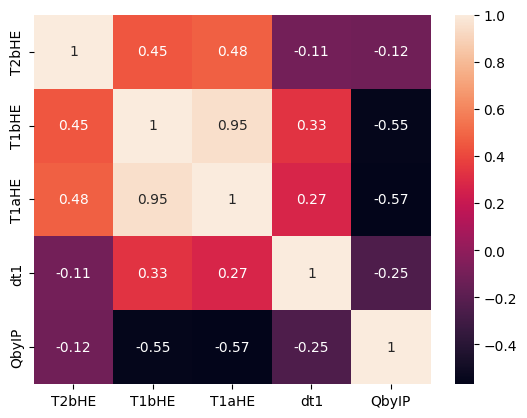

In [653]:
sns.heatmap(df_all.loc[:, ["T2bHE", "T1bHE", "T1aHE", "dt1", "QbyIP"]].corr(method="kendall"), annot=True)

# The dt1 for each fuel cycle has its own range
# From plots above there is a delayed correlation between T2bHE and dt1:
## The T2bHE can be considered as input
## The dt1 as output

In [725]:
t2bhe_all = df_all["T2bHE"]
dt1_all = df_all["dt1"]

<AxesSubplot: ylabel='T2bHE'>

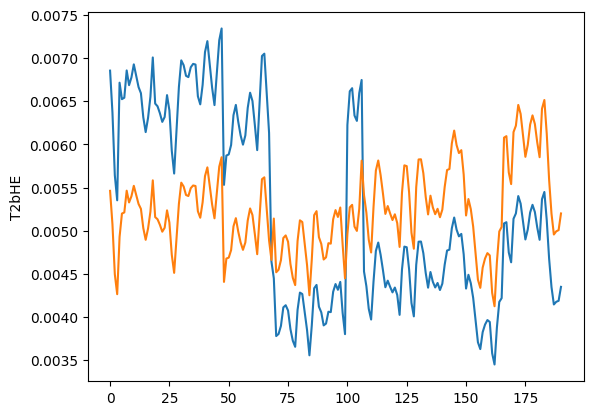

In [726]:
sns.lineplot(t2bhe_ctf_norm_all/t2bhe_ctf_norm_all.sum())
sns.lineplot(t2bhe_all/t2bhe_all.sum())

In [727]:
# check data for stationarity
ts_t2bhe_all, np_t2bhe_all = TimeSeries(t2bhe_all), NonParametric(t2bhe_all)
ts_dt1_all, np_dt1_all = TimeSeries(dt1_all), NonParametric(dt1_all)

In [728]:
ts_t2bhe_all.run_tests()
ts_dt1_all.run_tests()

Made <ADF> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The time series is stationary (or trend-stationary)
pvalue of test is 0.004

Made <KPSS> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The time series is non-stationary
pvalue of test is 0.045

Made <ADF> test:
 Fail to reject H0 hypothesis:
 Verdict: There is a unit root in data (non-stationary)
pvalue of test is 0.128

Made <KPSS> test:
 Fail to reject H0 hypothesis:
 Verdict: The time series is stationary
pvalue of test is 0.055



In [729]:
np_t2bhe_all.run_tests()


Made <KRUSKAL> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: Population medians are not equal
pvalue of test is 0.000

Made <WILCOXON> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: Medians of two samples are different
pvalue of test is 0.000

Made <MANNWHITNEYU> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: Two populations are not equal
pvalue of test is 0.000

Made <NORMALTEST> test:
 Fail to reject H0 hypothesis:
 Verdict: The data comes from a specified distribution
pvalue of test is 0.140

Made <SHAPIRO> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.050

Made <ANDERSON> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.032



In [730]:
np_dt1_all.run_tests()

Made <KRUSKAL> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: Population medians are not equal
pvalue of test is 0.002

Made <WILCOXON> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: Medians of two samples are different
pvalue of test is 0.000

Made <MANNWHITNEYU> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: Two populations are not equal
pvalue of test is 0.002

Made <NORMALTEST> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.000

Made <SHAPIRO> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.000

Made <ANDERSON> test:
 Reject H0 hypothesis -> H1 hypothesis:
 Verdict: The data does not come from a specified distribution
pvalue of test is 0.000



In [731]:
# check ccf
ccf_all = scipy.signal.correlate(t2bhe_all, dt1_all)

Text(0.5, 1.0, 'pacf for T2bHE')

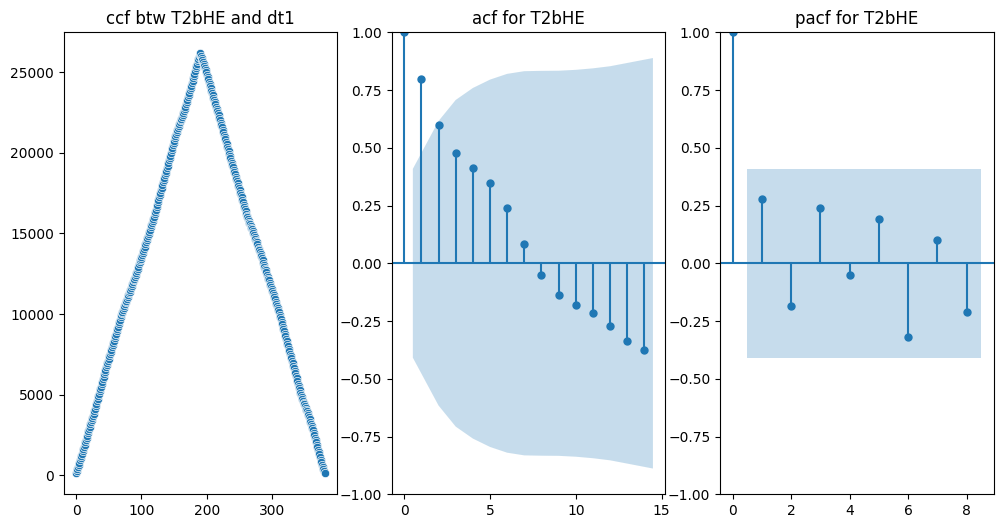

In [732]:
fig, axs = plt.subplots(1,3, figsize=(12,6))
sns.scatterplot(ccf_all, ax=axs[0])
axs[0].set_title("ccf btw T2bHE and dt1")

plot_acf(acf(t2bhe_all), ax=axs[1])
axs[1].set_title("acf for T2bHE")

plot_pacf(pacf(t2bhe_all), lags=8, ax=axs[2])
axs[2].set_title("pacf for T2bHE")


Text(0.5, 1.0, 'pacf for T2bHE after diff')

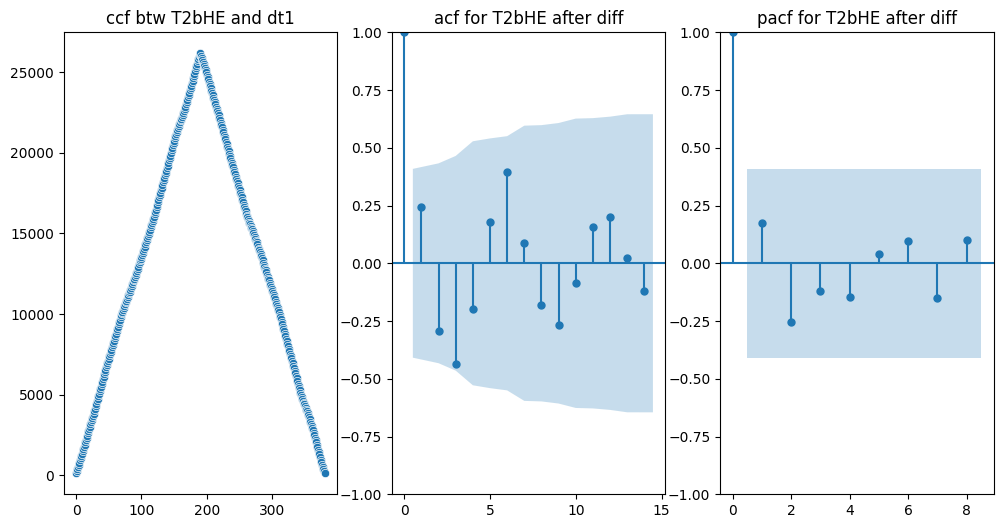

In [733]:
fig, axs = plt.subplots(1,3, figsize=(12,6))
sns.scatterplot(ccf_all, ax=axs[0])
axs[0].set_title("ccf btw T2bHE and dt1")

plot_acf(acf(t2bhe_all.diff().dropna()), ax=axs[1])
axs[1].set_title("acf for T2bHE after diff")

plot_pacf(pacf(t2bhe_all.diff().dropna()), lags=8, ax=axs[2])
axs[2].set_title("pacf for T2bHE after diff")


Text(0.5, 1.0, 'pacf for dt1')

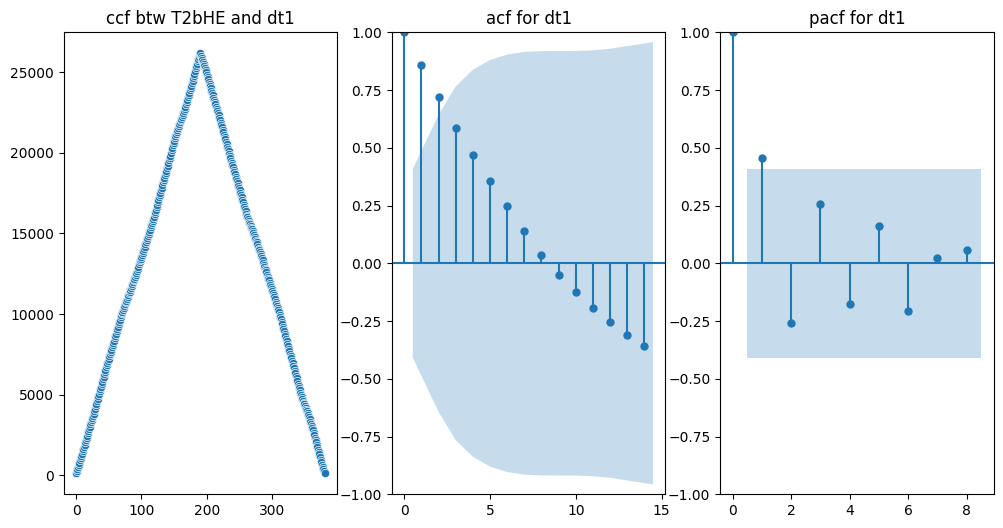

In [734]:
fig, axs = plt.subplots(1,3, figsize=(12,6))
sns.scatterplot(ccf_all, ax=axs[0])
axs[0].set_title("ccf btw T2bHE and dt1")

plot_acf(acf(dt1_all), ax=axs[1])
axs[1].set_title("acf for dt1")

plot_pacf(pacf(dt1_all), lags=8, ax=axs[2])
axs[2].set_title("pacf for dt1")


Text(0.5, 1.0, 'pacf for dt1 after diff')

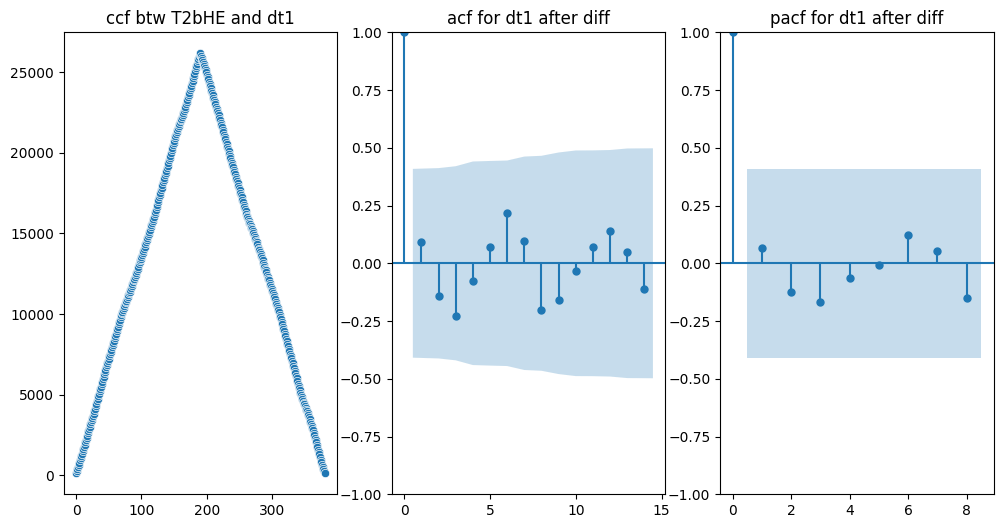

In [735]:
fig, axs = plt.subplots(1,3, figsize=(12,6))
sns.scatterplot(ccf_all, ax=axs[0])
axs[0].set_title("ccf btw T2bHE and dt1")

plot_acf(acf(dt1_all.diff().dropna()), ax=axs[1])
axs[1].set_title("acf for dt1 after diff")

plot_pacf(pacf(dt1_all.diff().dropna()), lags=8, ax=axs[2])
axs[2].set_title("pacf for dt1 after diff")


In [1022]:
length_all = len(df_all)

In [1117]:
train_all_ind = int(length_all*0.8)
test_all_ind = length_all

In [1118]:
train_all, test_all = df_all[ : train_all_ind], df_all[train_all_ind : test_all_ind]

In [1119]:
arima_t2bhe_all = model.ARIMA(t2bhe_all[:train_all_ind], order=(0,1,0), seasonal_order=(1,1,0,12)).fit()

In [1120]:
arima_t2bhe_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                            T2bHE   No. Observations:                  152
Model:             ARIMA(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -245.733
Date:                          Mon, 03 Jul 2023   AIC                            495.466
Time:                                  17:00:50   BIC                            501.335
Sample:                                       0   HQIC                           497.851
                                          - 152                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.4001      0.061     -6.594      0.000      -0.519      -0.281
sigma2         1.9794      0.161     12.272      0.000       1.663       2.296
===================================================================================
Ljung-Box (L1) (Q):                   0.88   Jarque-Bera (JB):                38.01
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.49
Prob(H) (two-sided):                  0.71   Kurtosis:                         5.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1121]:
pred_arima_t2bhe_all = arima_t2bhe_all.predict(start=train_all_ind, end=test_all_ind-1)

<AxesSubplot: ylabel='Tair'>

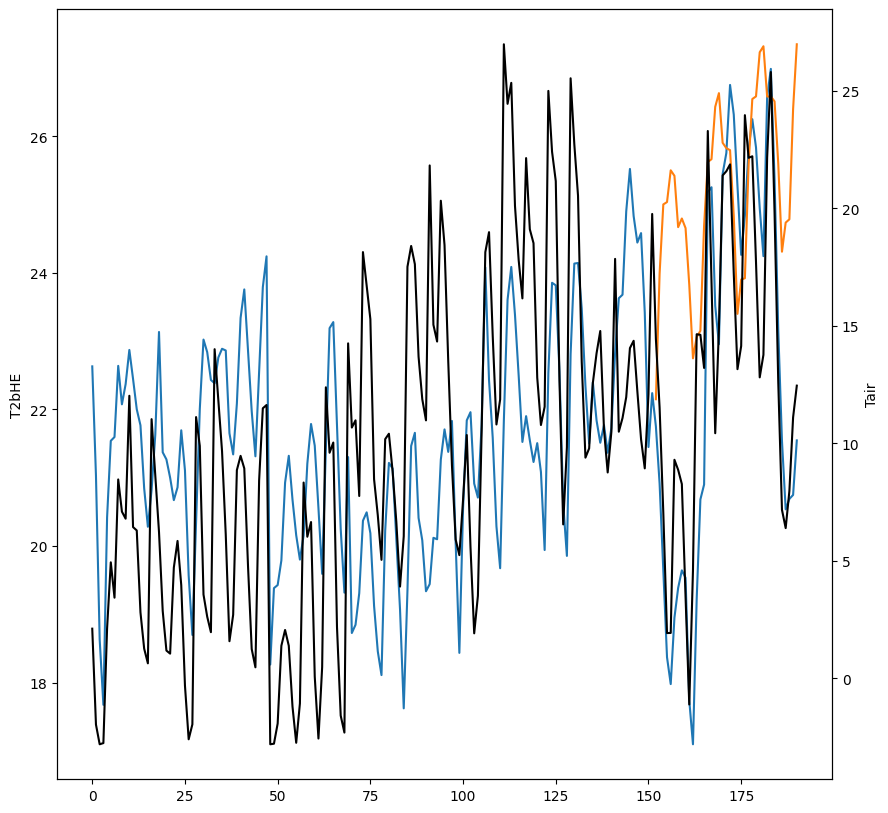

In [1122]:
fig, ax = plt.subplots(figsize=(10,10))
ax2 = ax.twinx()
sns.lineplot(x=df_all.index, y=df_all["T2bHE"], ax=ax)
sns.lineplot(x=test_all.index, y=pred_arima_t2bhe_all, ax=ax)
sns.lineplot(x=df_all.index, y=df_all["Tair"], ax=ax2, color="black")

# from fig above -> concrete correleation between T2bHE and Tair
# it can be super useful to predict rapid drops and so on
# But in examples below we do not take into account Tair to observe how good model can work without it

In [1123]:
arima_t2bhe_all_arparams = arima_t2bhe_all.arparams
t2bhe_all_resid = arima_t2bhe_all.resid

<AxesSubplot: >

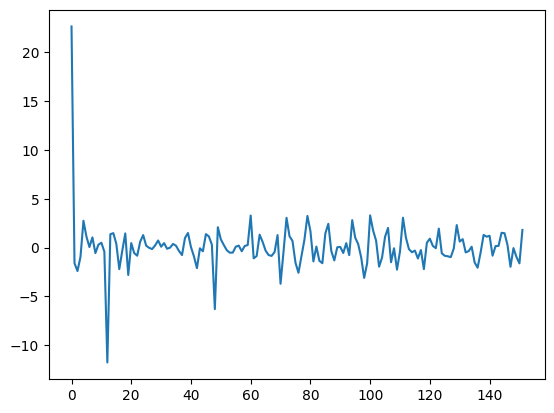

In [1124]:
sns.lineplot(t2bhe_all_resid)

In [1125]:
from statsmodels.tsa.filters import filtertools

In [1126]:
dt1_all_ar_filtered =  filtertools.recursive_filter(dt1_all.diff().diff().dropna(), ar_coeff=arima_t2bhe_all_arparams)

In [1127]:
ccf_all_ar_filtered = scipy.signal.correlate(t2bhe_all_resid, dt1_all_ar_filtered)

Text(0.5, 1.0, 'pacf for dt1')

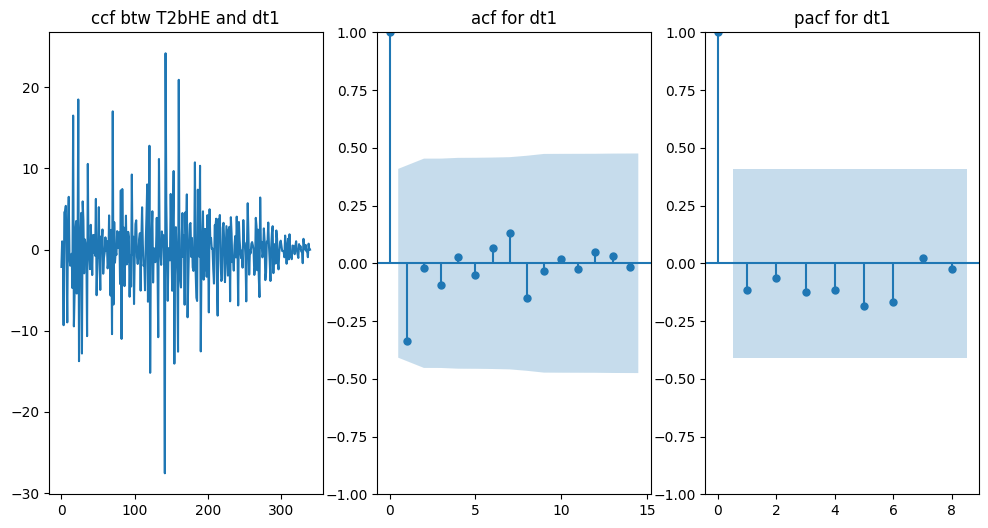

In [1128]:
fig, axs = plt.subplots(1,3, figsize=(12,6))
sns.lineplot(ccf_all_ar_filtered, ax=axs[0])
axs[0].set_title("ccf btw T2bHE and dt1")

plot_acf(acf(dt1_all_ar_filtered), ax=axs[1])
axs[1].set_title("acf for dt1")

plot_pacf(pacf(dt1_all_ar_filtered), lags=8, ax=axs[2])
axs[2].set_title("pacf for dt1")


<AxesSubplot: ylabel='dt1'>

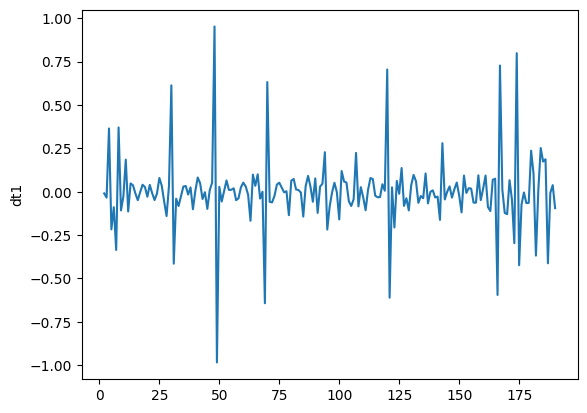

In [1129]:

sns.lineplot(dt1_all_ar_filtered)
# sns.histplot(dt1_all_ar_filtered)

In [1130]:
arima_dt1_all = model.ARIMA(
    dt1_all[:train_all_ind], 
    exog=t2bhe_all[:train_all_ind],
    order=(1,1,0), 
    seasonal_order=(1,1,0,12)
).fit()

In [1131]:
arima_dt1_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              dt1   No. Observations:                  152
Model:             ARIMA(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                  68.827
Date:                          Mon, 03 Jul 2023   AIC                           -129.654
Time:                                  17:00:59   BIC                           -117.916
Sample:                                       0   HQIC                          -124.884
                                          - 152                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T2bHE         -0.0652      0.005    -12.713      0.000      -0.075      -0.055
ar.L1          0.2120      0.147      1.440      0.150      -0.077       0.501
ar.S.L12      -0.4005      0.040    -10.043      0.000      -0.479      -0.322
sigma2         0.0214      0.001     19.424      0.000       0.019       0.024
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               500.96
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             1.08
Prob(H) (two-sided):                  0.61   Kurtosis:                        12.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1132]:
pred_arima_dt1_all = arima_dt1_all.predict(
    start=train_all_ind, 
    end=test_all_ind-1, 
    exog=t2bhe_all[train_all_ind:]
)

<AxesSubplot: ylabel='dt1'>

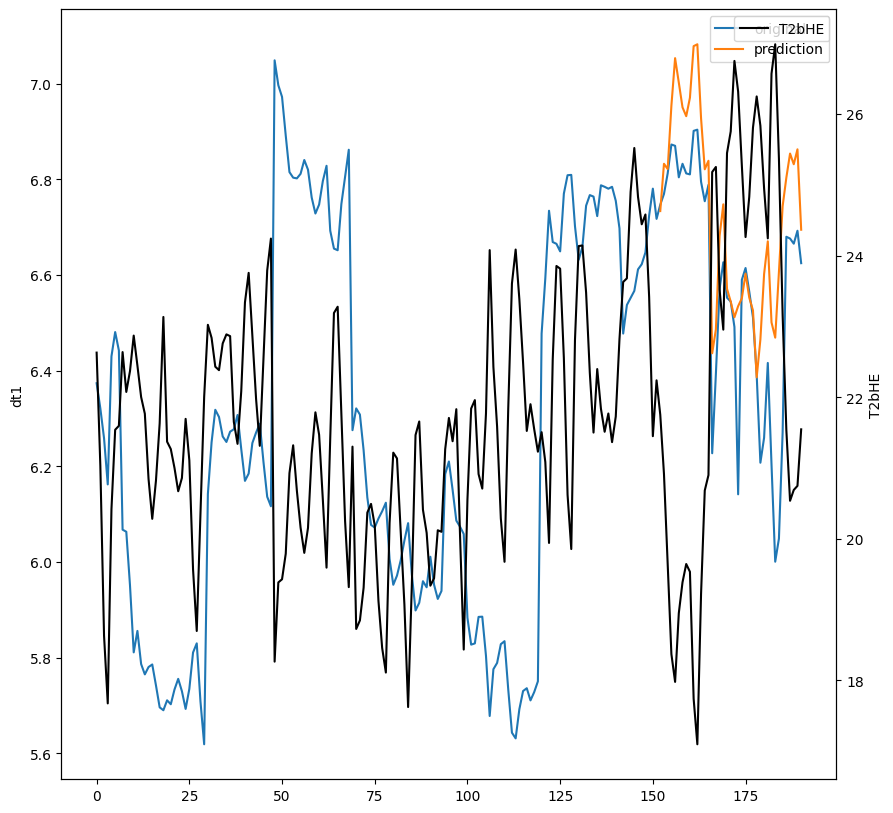

In [1133]:
fig, ax1 = plt.subplots(figsize=(10,10))

ax2 = ax1.twinx()

sns.lineplot(x=df_all.index, y=df_all["dt1"], ax=ax1, label="original")
sns.lineplot(x=df_all.index, y=df_all["T2bHE"], color="black", ax=ax2, label="T2bHE")
sns.lineplot(x=test_all.index, y=pred_arima_dt1_all, ax=ax1, label="prediction")


# The 1 thing is defently - the fuel cycle affect on dt1 so that much
# It's a reason why dt1 seems so different a some data points
# Lets consider fuel cycles independently or can T1bHE be used as well

<AxesSubplot: ylabel='dt1'>

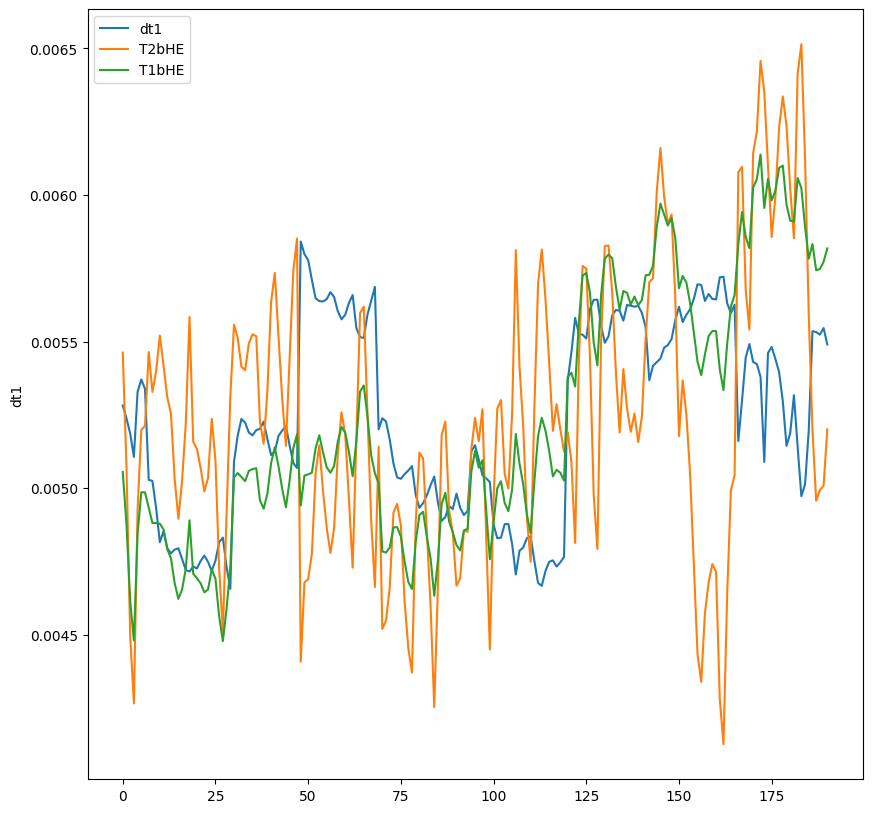

In [1134]:
plt.figure(figsize=(10,10))
sns.lineplot(x=df_all.index, y=df_all["dt1"]/df_all["dt1"].sum(), label="dt1")
sns.lineplot(x=df_all.index, y=df_all["T2bHE"]/df_all["T2bHE"].sum(), label="T2bHE")
sns.lineplot(x=df_all.index, y=df_all["T1bHE"]/df_all["T1bHE"].sum(), label="T1bHE")
# print(df_all_fc119)

In [1135]:
scipy.stats.kendalltau(df_all["T2bHE"], df_all["T1bHE"]), scipy.stats.kendalltau(df_all["T1bHE"], df_all["dt1"])

(SignificanceResult(statistic=0.4480022044640397, pvalue=3.484372661832527e-20),
 SignificanceResult(statistic=0.32785891430146047, pvalue=1.6404091137832604e-11))

In [1136]:
arima_dt1_all_2 = model.ARIMA(
    dt1_all[:train_all_ind], 
    exog=df_all[["T2bHE", "T1bHE"]][:train_all_ind],
    order=(0,1,0), 
    seasonal_order=(1,1,0,12)
).fit()

In [1137]:
pred_arima_dt1_all_2 = arima_dt1_all_2.predict(
    start=train_all_ind, 
    end=test_all_ind-1, 
    exog=df_all[["T2bHE", "T1bHE"]][train_all_ind:]
)

<AxesSubplot: ylabel='dt1'>

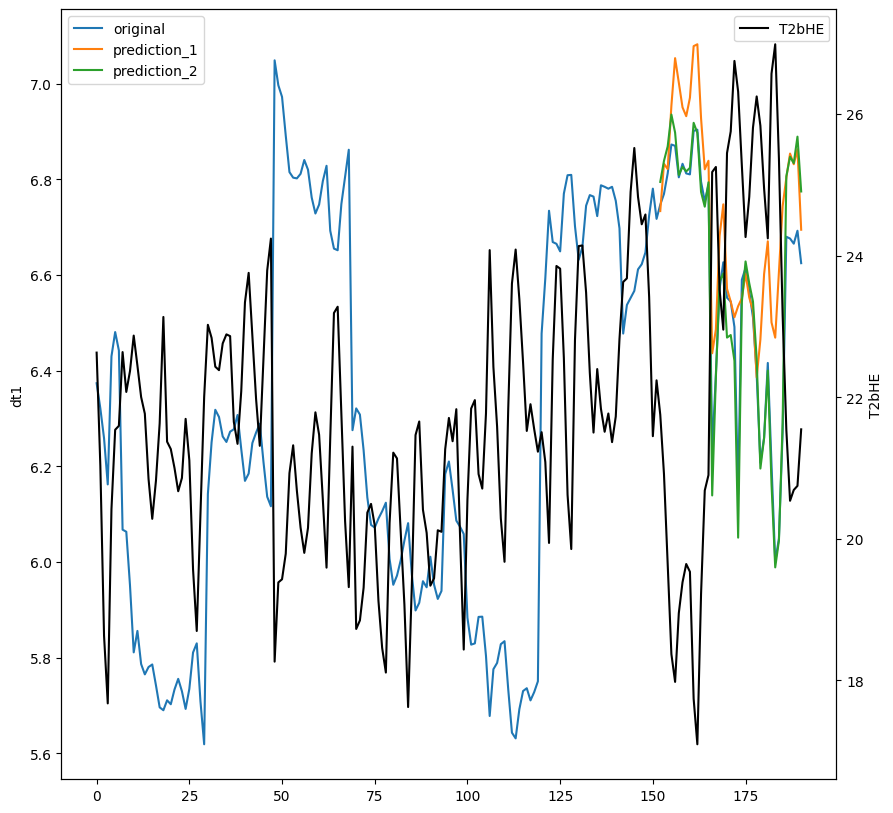

In [1138]:
fig, ax1 = plt.subplots(figsize=(10,10))

ax2 = ax1.twinx()

sns.lineplot(x=df_all.index, y=df_all["dt1"], ax=ax1, label="original")
sns.lineplot(x=df_all.index, y=df_all["T2bHE"], color="black", ax=ax2, label="T2bHE")
sns.lineplot(x=test_all.index, y=pred_arima_dt1_all, ax=ax1, label="prediction_1")
sns.lineplot(x=test_all.index, y=pred_arima_dt1_all_2, ax=ax1, label="prediction_2")


In [1139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [1140]:
pred_arima_dt1_all_mse = mean_squared_error(df_all.loc[train_all_ind:, "dt1"], pred_arima_dt1_all)
pred_arima_dt1_all_2_mse = mean_squared_error(df_all.loc[train_all_ind:, "dt1"], pred_arima_dt1_all_2)

pred_arima_dt1_all_mae = mean_absolute_error(df_all.loc[train_all_ind:, "dt1"], pred_arima_dt1_all)
pred_arima_dt1_all_2_mae = mean_absolute_error(df_all.loc[train_all_ind:, "dt1"], pred_arima_dt1_all_2)

In [1141]:
pred_arima_dt1_all_mse, pred_arima_dt1_all_2_mse, pred_arima_dt1_all_mae, pred_arima_dt1_all_2_mae

(0.0425684976699976,
 0.0049217700681287915,
 0.15274317243062177,
 0.04782847749248494)

# MSE and MAE reports on good prediction results
# Especially after T1bHE were taken into account
# But in reality T1bHE, T2bHE and dt1 depends on each other so it's multivariate case when one can depends on other and vice versa. It's like a closed loop but one may vary due to changes (Tair for example)


In [1142]:
tair_all = df_all.loc[:, "Tair"].copy()

<AxesSubplot: ylabel='CTF_sum'>

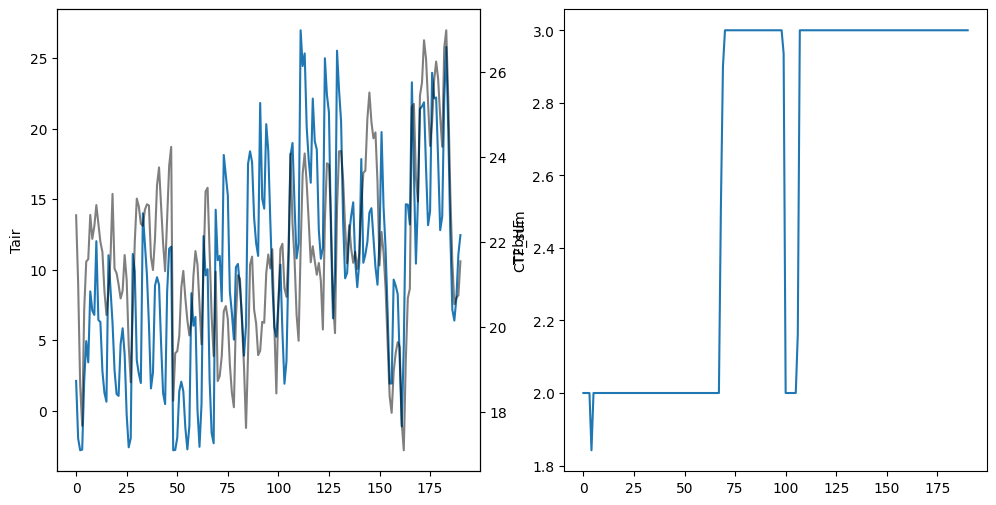

In [1143]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
ax2 = axs[0].twinx()
sns.lineplot(tair_all, ax=axs[0])
sns.lineplot(t2bhe_all, ax=ax2, color="black", alpha=0.5)

sns.lineplot(df_all["CTF_sum"], ax=axs[1])

In [1144]:
scipy.stats.kendalltau(t2bhe_all, tair_all)

SignificanceResult(statistic=0.3641874949714205, pvalue=7.377906321502145e-14)

In [1145]:
ccf_all_air = scipy.signal.correlate(t2bhe_all, tair_all)

Text(0.5, 1.0, 'pacf for Tair')

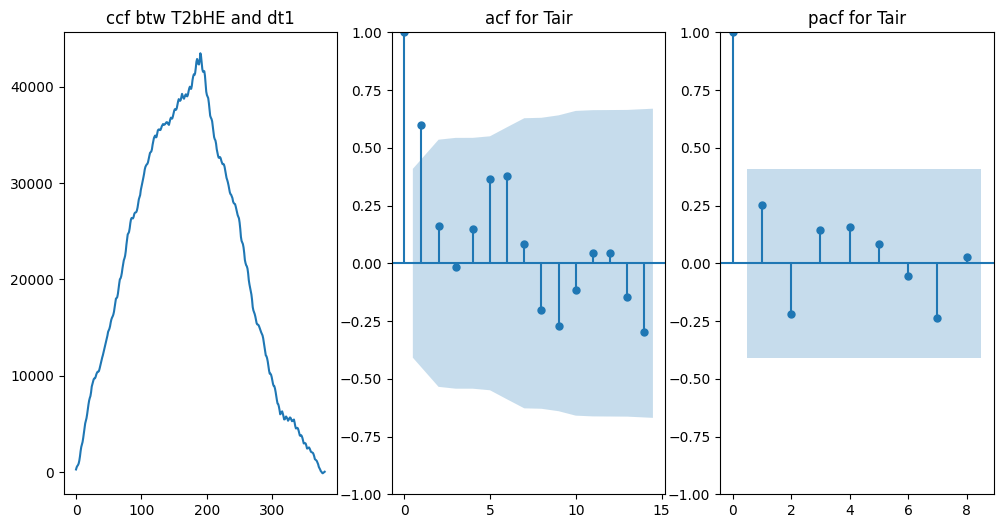

In [1146]:
fig, axs = plt.subplots(1,3, figsize=(12,6))
sns.lineplot(ccf_all_air, ax=axs[0])
axs[0].set_title("ccf btw T2bHE and dt1")

plot_acf(acf(tair_all), ax=axs[1])
axs[1].set_title("acf for Tair")

plot_pacf(pacf(tair_all), lags=8, ax=axs[2])
axs[2].set_title("pacf for Tair")


Text(0.5, 1.0, 'pacf for Tair after diff')

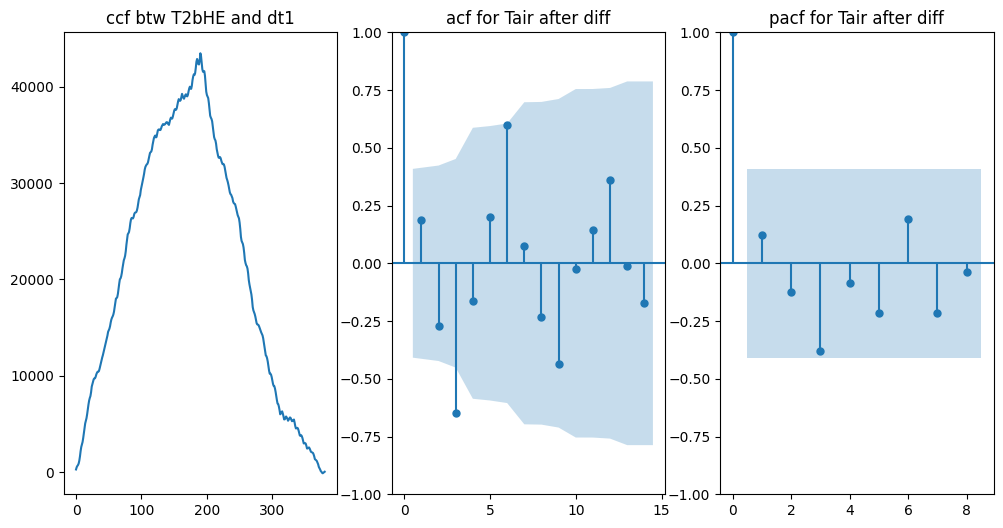

In [1147]:
fig, axs = plt.subplots(1,3, figsize=(12,6))
sns.lineplot(ccf_all_air, ax=axs[0])
axs[0].set_title("ccf btw T2bHE and dt1")

plot_acf(acf(tair_all.diff().dropna()), ax=axs[1])
axs[1].set_title("acf for Tair after diff")

plot_pacf(pacf(tair_all.diff().dropna()), lags=8, ax=axs[2])
axs[2].set_title("pacf for Tair after diff")


In [1148]:
tair_all_ar_filtered =  filtertools.recursive_filter(dt1_all.diff().dropna(), ar_coeff=arima_t2bhe_all_arparams)

In [1149]:
ccf_all_air_ar_filtered = scipy.signal.correlate(t2bhe_all_resid, tair_all_ar_filtered)

Text(0.5, 1.0, 'pacf for Tair filtered')

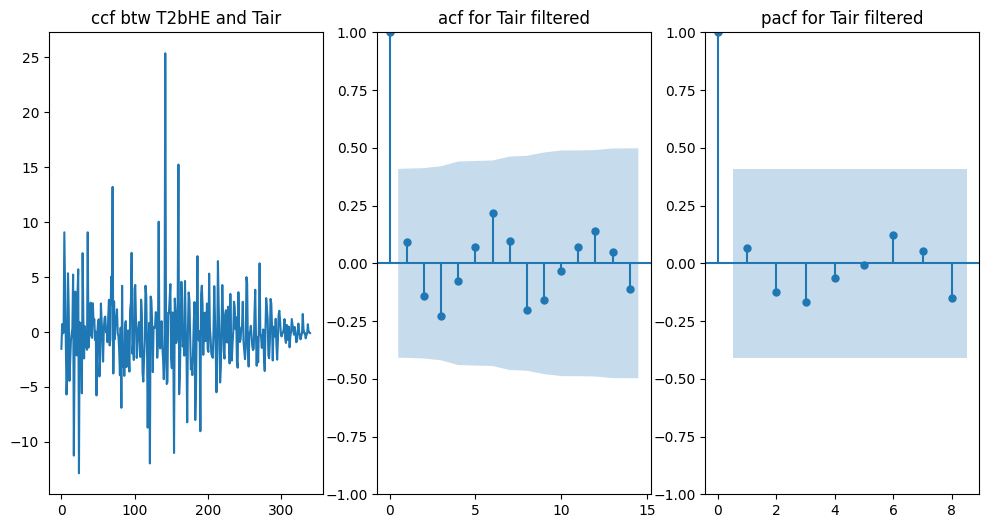

In [1150]:
fig, axs = plt.subplots(1,3, figsize=(12,6))
sns.lineplot(ccf_all_air_ar_filtered, ax=axs[0])
axs[0].set_title("ccf btw T2bHE and Tair")

plot_acf(acf(tair_all_ar_filtered), ax=axs[1])
axs[1].set_title("acf for Tair filtered")

plot_pacf(pacf(tair_all_ar_filtered), lags=8, ax=axs[2])
axs[2].set_title("pacf for Tair filtered")


In [1177]:
arima_dt1_all_3 = model.ARIMA(
    dt1_all[:train_all_ind], 
    exog=df_all[["T2bHE", "T1bHE", "Tair"]][:train_all_ind],
    order=(0,1,0), 
    seasonal_order=(1,1,0,12)
).fit()

In [1178]:
arima_dt1_all_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              dt1   No. Observations:                  152
Model:             ARIMA(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 313.109
Date:                          Mon, 03 Jul 2023   AIC                           -616.219
Time:                                  17:46:31   BIC                           -601.546
Sample:                                       0   HQIC                          -610.256
                                          - 152                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T2bHE         -0.2511      0.002   -100.453      0.000      -0.256      -0.246
T1bHE          0.2645      0.002    118.009      0.000       0.260       0.269
Tair           0.0017      0.001      2.566      0.010       0.000       0.003
ar.S.L12      -0.3412      0.076     -4.470      0.000      -0.491      -0.192
sigma2         0.0006   7.04e-05      9.090      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   4.27   Jarque-Bera (JB):                 3.02
Prob(Q):                              0.04   Prob(JB):                         0.22
Heteroskedasticity (H):               1.75   Skew:                             0.27
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1179]:
pred_arima_dt1_all_3 = arima_dt1_all_3.predict(
    start=train_all_ind, 
    end=test_all_ind-1, 
    exog=df_all[["T2bHE", "T1bHE", "Tair"]][train_all_ind:]
)

<AxesSubplot: ylabel='dt1'>

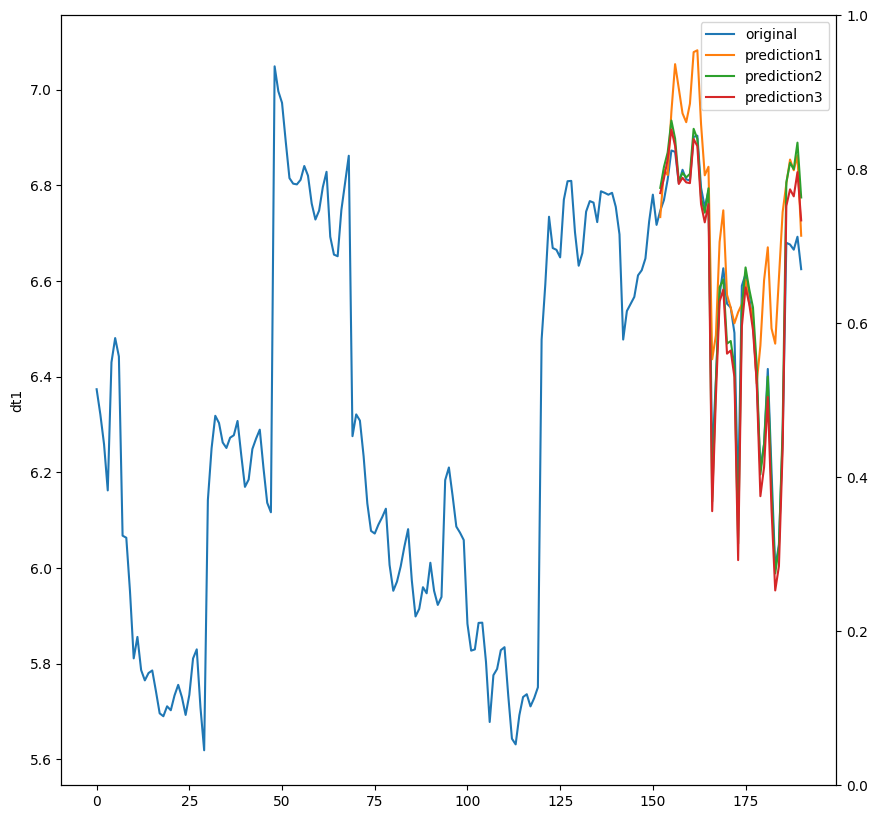

In [1180]:
fig, ax1 = plt.subplots(figsize=(10,10))

ax2 = ax1.twinx()

sns.lineplot(x=df_all.index, y=df_all["dt1"], ax=ax1, label="original")
sns.lineplot(x=test_all.index, y=pred_arima_dt1_all, ax=ax1, label="prediction1")
sns.lineplot(x=test_all.index, y=pred_arima_dt1_all_2, ax=ax1, label="prediction2")
sns.lineplot(x=test_all.index, y=pred_arima_dt1_all_3, ax=ax1, label="prediction3")
# sns.lineplot(x=df_all.index, y=df_all["Tair"], ax=ax2, color="black", alpha=0.3)


# The results above report that Tair has closed to other temperature params behavior (cycles, seasonals)
# Is there any correlation for QbyIP?

In [1181]:
ccf_all_qbyip = scipy.signal.correlate(t2bhe_all, qbyip_all)

Text(0.5, 1.0, 'pacf for QbyIP')

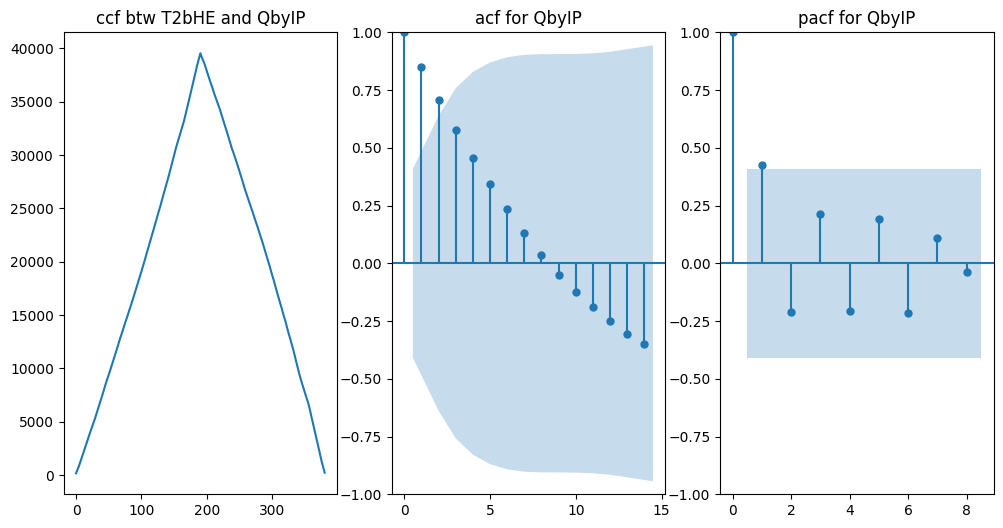

In [1182]:
fig, axs = plt.subplots(1,3, figsize=(12,6))
sns.lineplot(ccf_all_qbyip, ax=axs[0])
axs[0].set_title("ccf btw T2bHE and QbyIP")

plot_acf(acf(qbyip_all), ax=axs[1])
axs[1].set_title("acf for QbyIP")

plot_pacf(pacf(qbyip_all), lags=8, ax=axs[2])
axs[2].set_title("pacf for QbyIP")


Text(0.5, 1.0, 'pacf for QbyIP after diff')

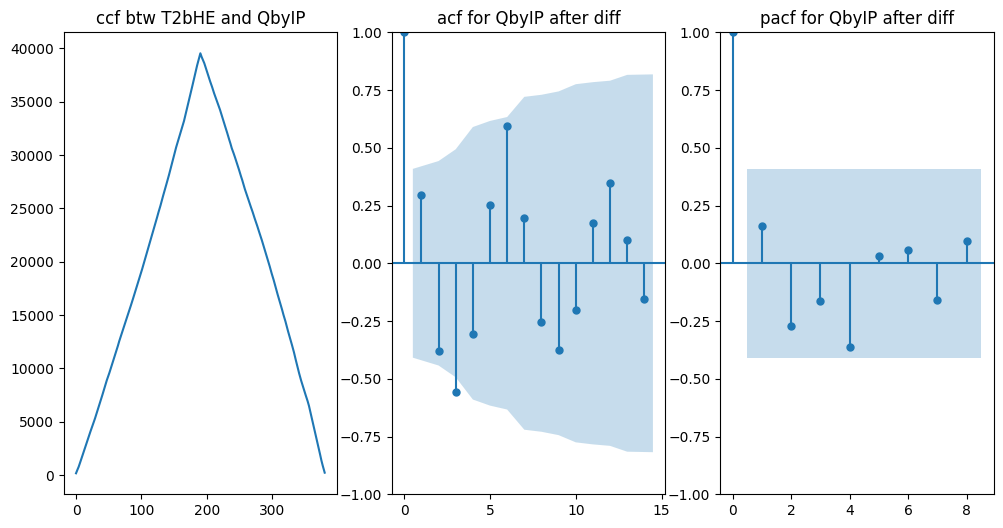

In [1183]:
fig, axs = plt.subplots(1,3, figsize=(12,6))
sns.lineplot(ccf_all_qbyip, ax=axs[0])
axs[0].set_title("ccf btw T2bHE and QbyIP")

plot_acf(acf(qbyip_all.diff().dropna()), ax=axs[1])
axs[1].set_title("acf for QbyIP after diff")

plot_pacf(pacf(qbyip_all.diff().dropna()), lags=8, ax=axs[2])
axs[2].set_title("pacf for QbyIP after diff")


In [1184]:
qbyip_all_ar_filtered =  filtertools.recursive_filter(qbyip_all.diff().dropna(), ar_coeff=arima_t2bhe_all_arparams)

In [1185]:
ccf_all_qbyip_ar_filtered = scipy.signal.correlate(t2bhe_all_resid, qbyip_all_ar_filtered)

Text(0.5, 1.0, 'pacf for QbyIP filtered')

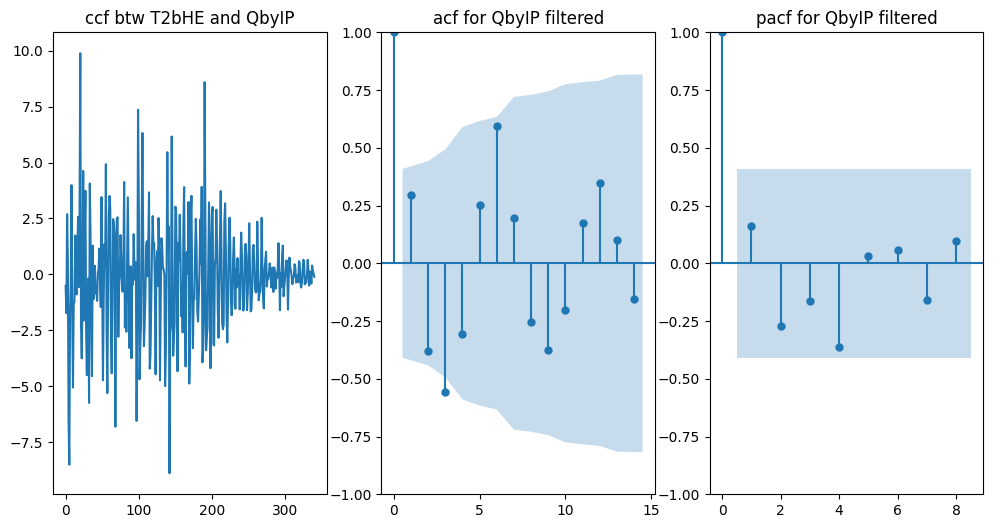

In [1186]:
fig, axs = plt.subplots(1,3, figsize=(12,6))
sns.lineplot(ccf_all_qbyip_ar_filtered, ax=axs[0])
axs[0].set_title("ccf btw T2bHE and QbyIP")

plot_acf(acf(qbyip_all_ar_filtered), ax=axs[1])
axs[1].set_title("acf for QbyIP filtered")

plot_pacf(pacf(qbyip_all_ar_filtered), lags=8, ax=axs[2])
axs[2].set_title("pacf for QbyIP filtered")


In [1187]:
arima_dt1_all_4 = model.ARIMA(
    dt1_all[:train_all_ind], 
    exog=df_all[["T2bHE", "T1bHE", "Tair", "QbyIP"]][:train_all_ind],
    order=(0,1,0), 
    seasonal_order=(1,1,0,12)
).fit()

In [1188]:
arima_dt1_all_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              dt1   No. Observations:                  152
Model:             ARIMA(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 314.258
Date:                          Mon, 03 Jul 2023   AIC                           -616.515
Time:                                  17:46:50   BIC                           -598.908
Sample:                                       0   HQIC                          -609.360
                                          - 152                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T2bHE         -0.2520      0.003    -96.155      0.000      -0.257      -0.247
T1bHE          0.2642      0.002    120.965      0.000       0.260       0.268
Tair           0.0013      0.001      1.934      0.053    -1.8e-05       0.003
QbyIP          0.0484      0.033      1.469      0.142      -0.016       0.113
ar.S.L12      -0.3309      0.074     -4.447      0.000      -0.477      -0.185
sigma2         0.0006   6.81e-05      9.250      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   3.32   Jarque-Bera (JB):                 3.97
Prob(Q):                              0.07   Prob(JB):                         0.14
Heteroskedasticity (H):               1.84   Skew:                             0.29
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1189]:
pred_arima_dt1_all_4 = arima_dt1_all_4.predict(
    start=train_all_ind, 
    end=test_all_ind-1, 
    exog=df_all[["T2bHE", "T1bHE", "Tair", "QbyIP"]][train_all_ind:]
)

<AxesSubplot: ylabel='QbyIP'>

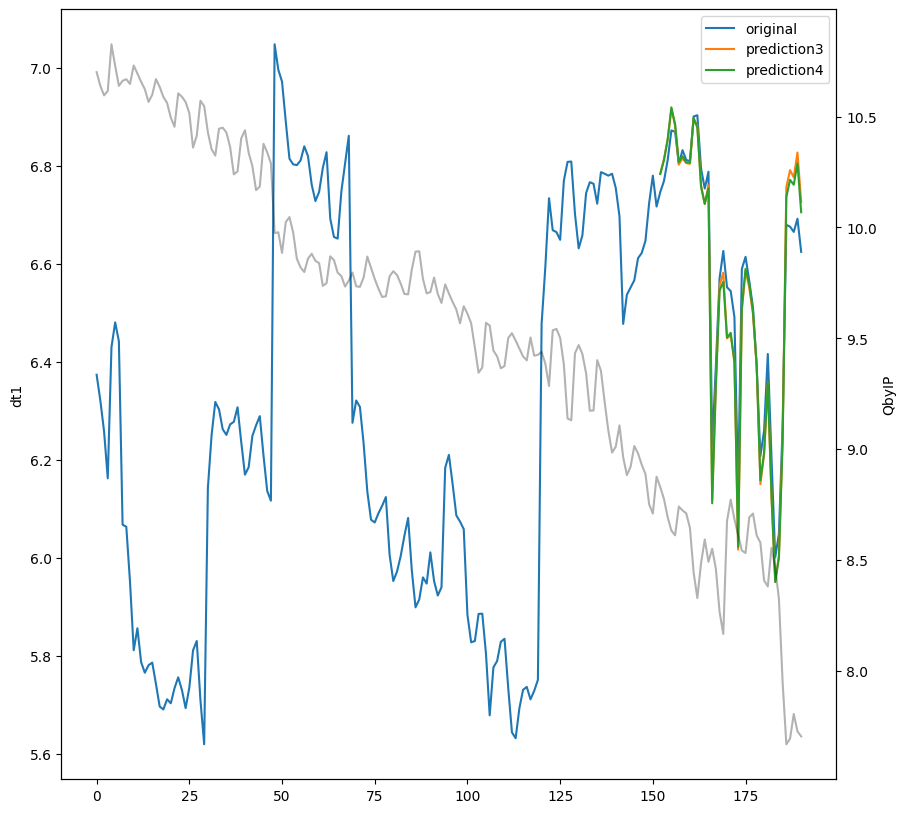

In [1191]:
fig, ax1 = plt.subplots(figsize=(10,10))

ax2 = ax1.twinx()

sns.lineplot(x=df_all.index, y=df_all["dt1"], ax=ax1, label="original")
# sns.lineplot(x=test_all.index, y=pred_arima_dt1_all, ax=ax1, label="prediction1")
# sns.lineplot(x=test_all.index, y=pred_arima_dt1_all_2, ax=ax1, label="prediction2")
sns.lineplot(x=test_all.index, y=pred_arima_dt1_all_3, ax=ax1, label="prediction3")
sns.lineplot(x=test_all.index, y=pred_arima_dt1_all_4, ax=ax1, label="prediction4")
sns.lineplot(x=df_all.index, y=df_all["QbyIP"], ax=ax2, color="black", alpha=0.3)
